In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [85]:
def draw_mass_sprectrum(df, xlim=(None, None), ylim=(None, None)):
    df = df.sort_values(by="mass")
    
    # probably remake with M
    mass = df.mass.values
    if xlim[0] is None:
        xlim = (mass.min(), xlim[1])
    if xlim[1] is None:
        xlim = (xlim[0], mass.max())
    
    intensity = df.I.values
    intensity = intensity[(xlim[0] <= mass) & (mass <= xlim[1])]
    mass = mass[(xlim[0] <= mass) & (mass <= xlim[1])]
    
    # bas solution, probably it's needed to rewrite this piece
    M = np.zeros((len(mass), 3))
    M[:, 0] = mass
    M[:, 1] = mass
    M[:, 2] = mass
    M = M.reshape(-1)
    
    I = np.zeros((len(intensity), 3))
    I[:, 1] = intensity
    I = I.reshape(-1)

    plt.plot(M, I, color="black")
    plt.plot([xlim[0], xlim[1]], [0, 0], color='black')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("m/z, Da")
    plt.ylabel("Intensity")
    
    return
    
def normalize(df):
    df = df.copy()
    df.I /= df.I.max()
    return df

### With alignment

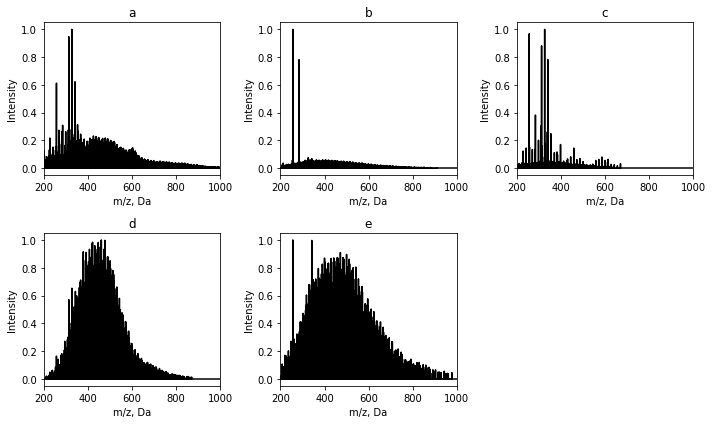

In [86]:
plt.figure(figsize=(10, 6))
names = "abcde"
for i, filename in enumerate(sorted([filename for filename in os.listdir("data/") if "SRHA" in filename])):
    df = pd.read_csv(f"data/{filename}", sep='\t').rename(columns={"mw":"mass", "relativeAbundance":"I"})
    plt.subplot(231 + i)
    plt.title(names[i])
    draw_mass_sprectrum(df, xlim=(200, 1000))

plt.tight_layout()


### Without

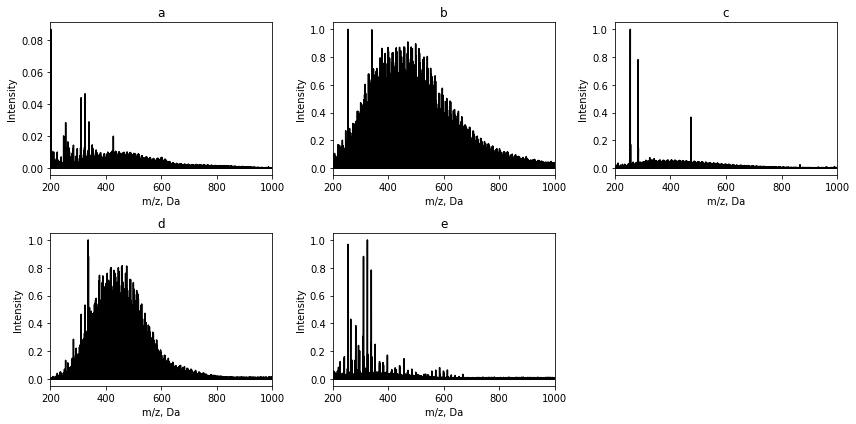

In [81]:
plt.figure(figsize=(12, 6), facecolor='white')
names = "abcde"
for i, filename in enumerate(names):
    df = pd.read_csv(f"mass-lists//{filename}/SRHA.csv", sep=',').rename(columns={"M/z":"mass",  
                                                                                  "m/z":"mass", 
                                                                                  "mz":"mass", 
                                                                                  "Intensity":"I"})
    
    df = normalize(df)
    plt.subplot(231 + i)
    plt.title(names[i])
    draw_mass_sprectrum(df, xlim=(200, 1000))

    
    
plt.tight_layout()
plt.savefig("Figure3a.png", )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


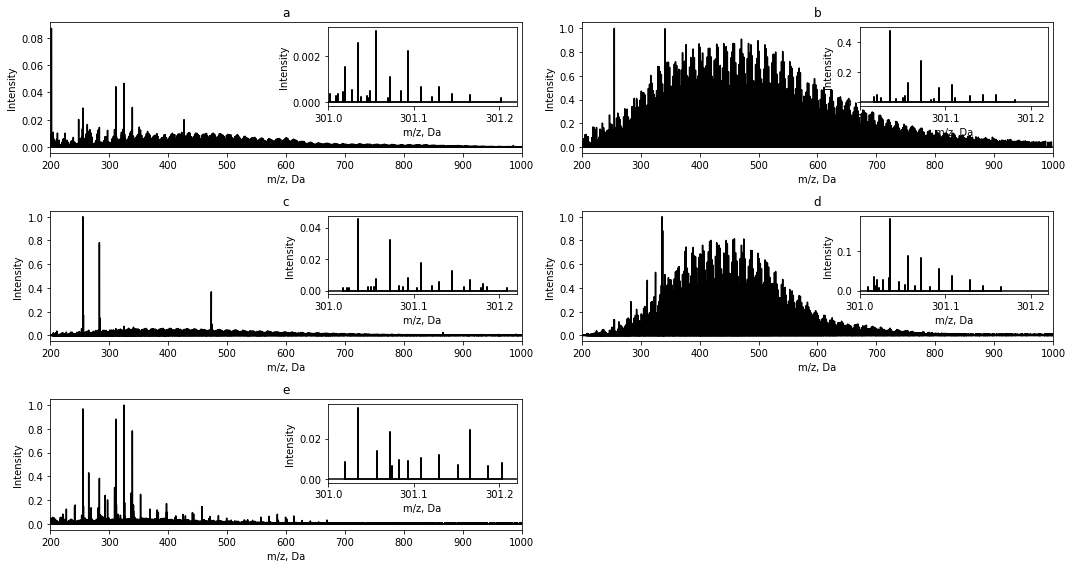

In [108]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes as inset_axes_func
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15, 8))
names = "abcde"
for i, filename in enumerate(names):
    df = pd.read_csv(f"mass-lists//{filename}/SRHA.csv", sep=',').rename(columns={"M/z":"mass",  
                                                                                  "m/z":"mass", 
                                                                                  "mz":"mass", 
                                                                                  "Intensity":"I"})
    
    df = normalize(df)
    ax = fig.add_subplot(321 + i)
    
    plt.title(names[i])
    draw_mass_sprectrum(df, xlim=(200, 1000))
    
    
    inset_axes = inset_axes_func(ax, 
                    width="40%", # width = 30% of parent_bbox
                    height="60%", # height : 1 inch
                                )
    
    draw_mass_sprectrum(df, xlim=(301, 301.22))
    plt.xticks([301.0, 301.1, 301.2])
    
    
    
plt.tight_layout()
plt.savefig("Figures/Figure3b.png", dpi=600)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


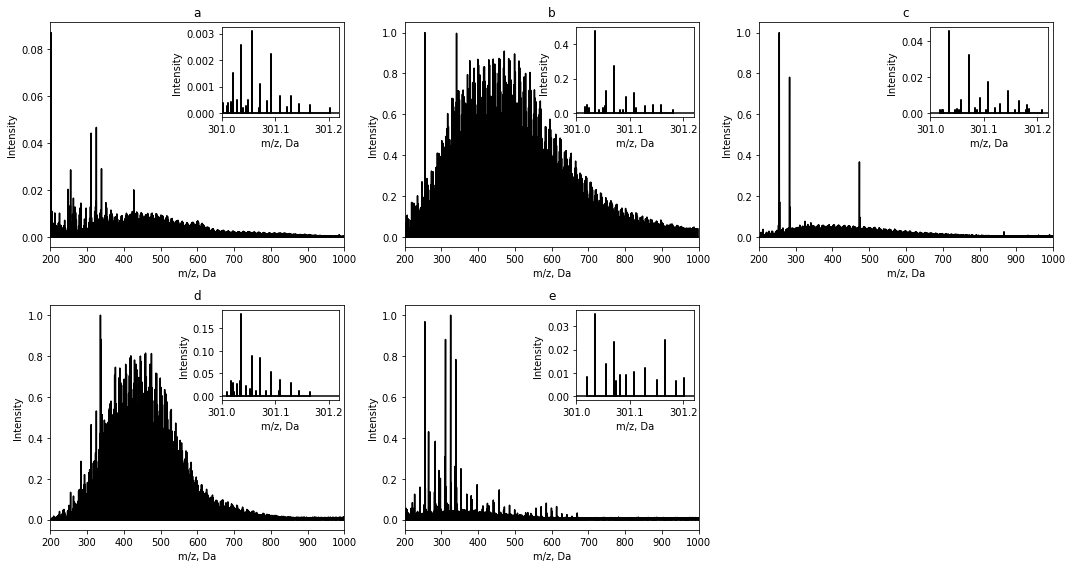

In [111]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes as inset_axes_func
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15, 8))
names = "abcde"
for i, filename in enumerate(names):
    df = pd.read_csv(f"mass-lists//{filename}/SRHA.csv", sep=',').rename(columns={"M/z":"mass",  
                                                                                  "m/z":"mass", 
                                                                                  "mz":"mass", 
                                                                                  "Intensity":"I"})
    
    df = normalize(df)
    ax = fig.add_subplot(231 + i)
    
    plt.title(names[i])
    draw_mass_sprectrum(df, xlim=(200, 1000))
    
    
    inset_axes = inset_axes_func(ax, 
                    width="40%", # width = 30% of parent_bbox
                    height="40%", # height : 1 inch
                                )
    
    draw_mass_sprectrum(df, xlim=(301, 301.22))
    plt.xticks([301.0, 301.1, 301.2])
    
    
    
plt.tight_layout()
plt.savefig("Figures/Figure3b.png", dpi=600)